### This jupyter notebook is to unit-test CFE model run

## Preparation

In [4]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [5]:
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018.csv",
    "catchment_area_km2": 0.1210,
    "soil_params": {
        "bb": 5,
        "satdk": 3.67e-05,
        "satpsi": 0.141,
        "slop": 0.13742288100015995,
        "smcmax": 0.998,
        "wltsmc": 0.000142,
        "D": 0.6,
    },
    "max_gw_storage": 0.1964128583705216,
    "Cgw": 2.89e-05,
    "expon": 8.0,
    "K_nash": 0.0013,
    "refkdt": 3,
    "trigger_z_fact": 0.5,
    "alpha_fc": 0.33,
    "K_lf": 0.7900613627981135,
    "num_nash_storage": 2, 
    "giuh_ordinates": [1.0],
    "stand_alone": 1,
    "unit_test": 1,
    "time_step_size": 86400,
    "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv",
}

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

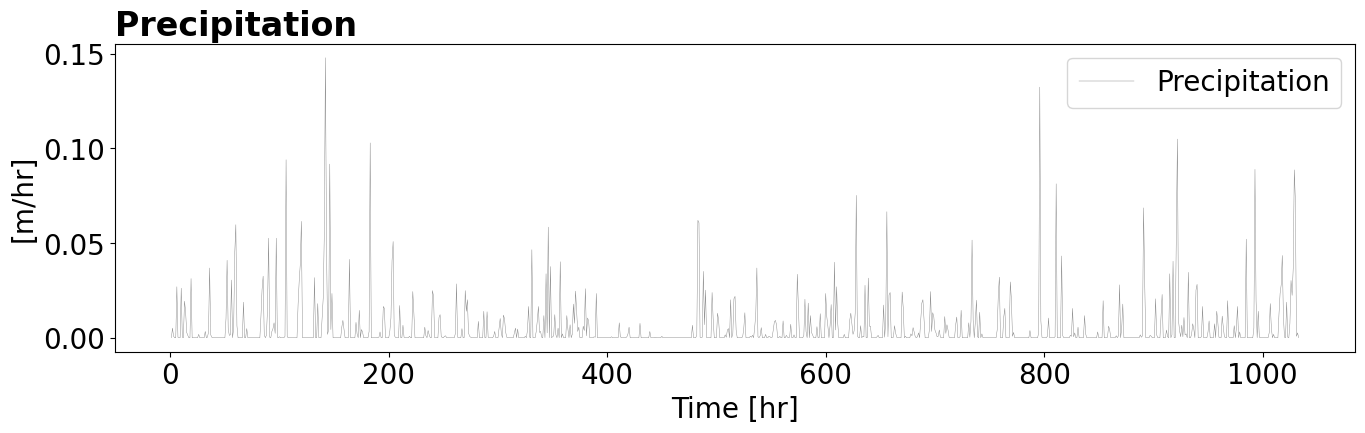

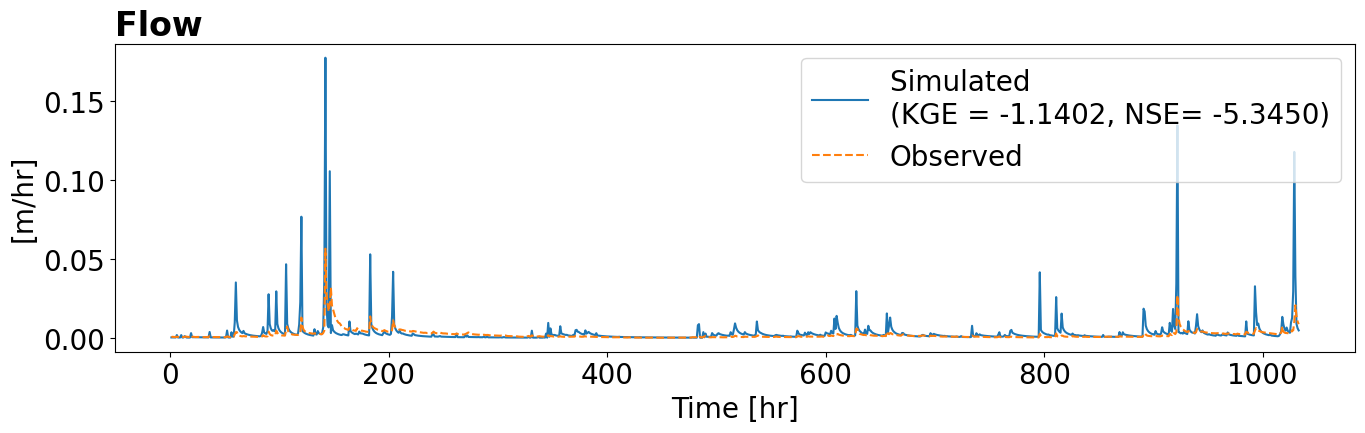

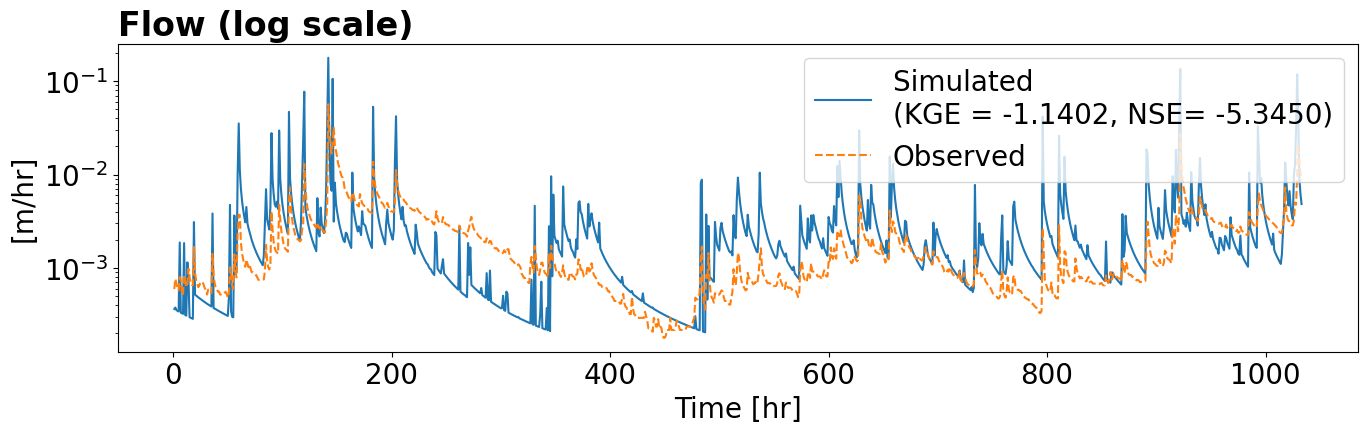

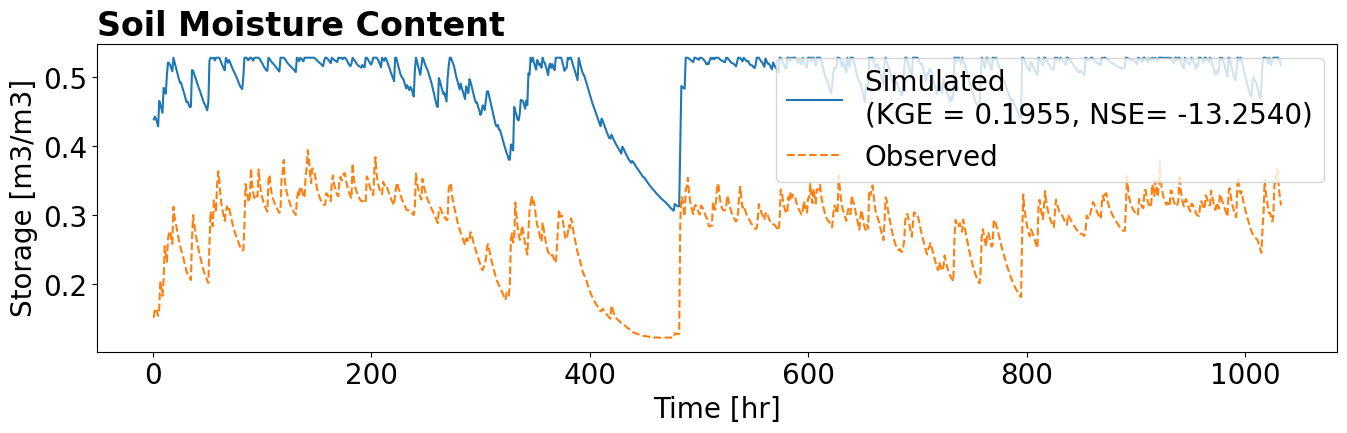

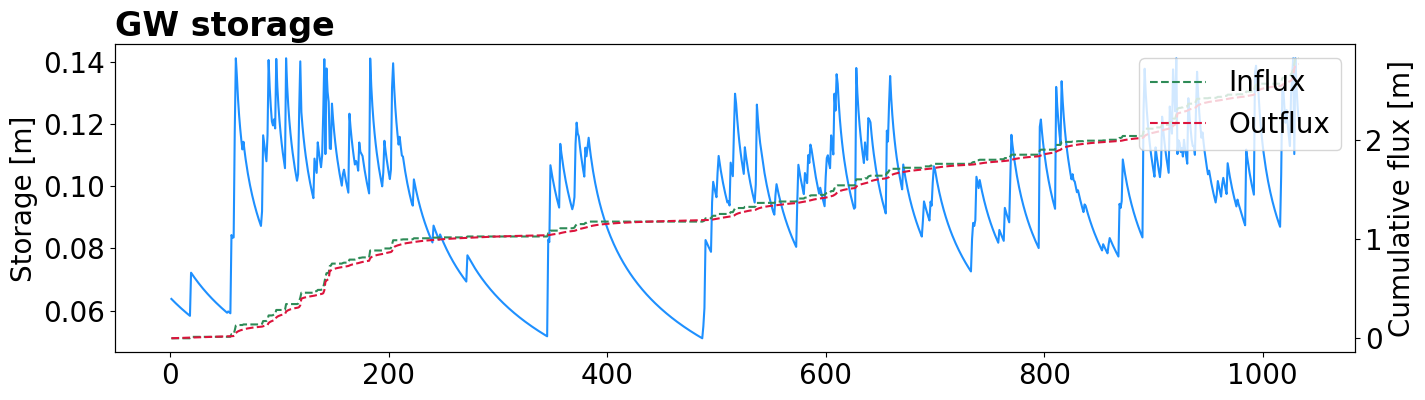

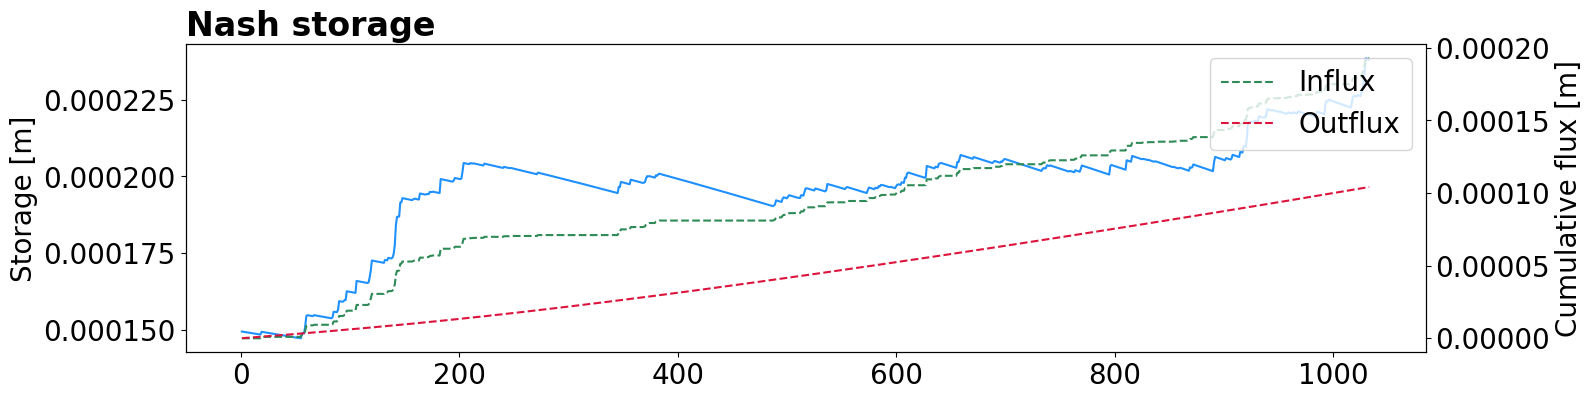

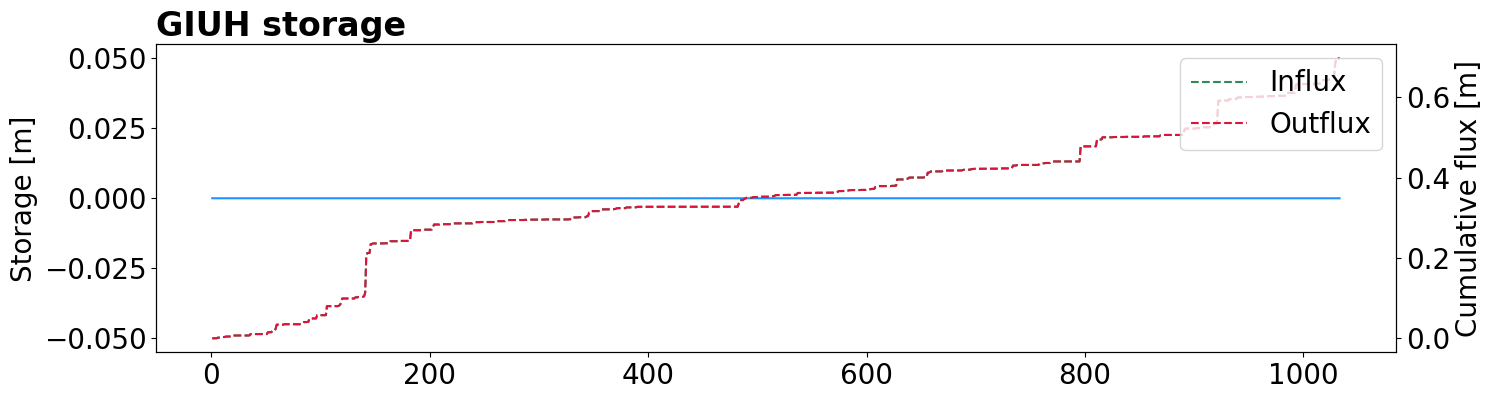


GLOBAL MASS BALANCE
      initial volume:   0.3356
        volume input:   5.7958
       volume output:   5.7073
        final volume:   0.4241
            residual: 3.8858e-16

 Discharge details
Cumulative discharge: 3.47
        Runoff ratio: 0.60
      Surface runoff: 0.20
  Deep GW to channel: 0.80
        Lateral flow: 0.00

 AET & PET
      volume PET:   2.3682
      volume AET:   2.2375
ET from rainfall:   0.6606
    ET from soil:   1.5770

SCHAAKE MASS BALANCE
    volume input:   5.7958
ET from rainfall:   0.6606
  surface runoff:   0.6974
             IOF:   0.6245
             SOF:   0.0730
    infiltration:   4.4378
schaake residual: -7.9936e-15

GIUH MASS BALANCE
  vol. into giuh:   0.6974
   vol. out giuh:   0.6974
 vol. end giuh q:   0.0000
   giuh residual: 0.0000e+00

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.2712
  vol. into soil:   4.4378
vol.soil2latflow:   0.0002
 vol. soil to gw:   2.8247
 vol. soil to ET:   1.5770
 final vol. soil:   0.3

In [6]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 1034)),
    warm_up=True,
    warmup_offset=300,
    warmup_iteration=10
)
cfe_instance.finalize(print_mass_balance=True)